In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
rc('pdf', fonttype=42)
rc('ps', fonttype=42)
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

THIS_DIR = os.path.dirname(os.path.realpath("__file__"))
SAVE_DIR = os.path.join(THIS_DIR, "results")
FIG_DIR = os.path.join(THIS_DIR, "figures")
os.makedirs(FIG_DIR, exist_ok=True)
from collections import OrderedDict

In [2]:
exp_names = OrderedDict([
    ("ground_wall_pbd_warp", "PBD (Warp)"),
    ("ground_wall_pbd_brax", "PBD (Brax)"),
    ("ground_wall_soft_warp", "Compliant (Warp)"),
    ("ground_wall_soft_brax", "Compliant (Brax)"),
    ("ground_wall_convexopt_diffcosim_symplectic_euler_w_toi", "Convex (w/ TOI)"),
    ("ground_wall_convexopt_diffcosim_symplectic_euler_wo_toi", "Convex (w/o TOI)"),
    ("ground_wall_specialized_difftaichi_w_toi", "Direct (w/ TOI)"),
    ("ground_wall_specialized_difftaichi_wo_toi", "Direct (w/o TOI)"),
    ("ground_wall_lcp_nimble", "LCP (w/ TOI)"),
])
kwargs = OrderedDict([
    ("ground_wall_convexopt_diffcosim_symplectic_euler_w_toi", {"color": "#c15924", "linestyle": "dashed"}),
    ("ground_wall_convexopt_diffcosim_symplectic_euler_wo_toi", {"color": "#ffc13d", "linestyle": "dashed"}),
    ("ground_wall_specialized_difftaichi_w_toi", {"color": "#1428d6", "linestyle": "dotted"}),
    ("ground_wall_specialized_difftaichi_wo_toi", {"color": "#488ff0", "linestyle": "dotted"}),
    ("ground_wall_pbd_brax", {"color": "#009999", "linestyle": (0, (3, 1, 1, 1, 1, 1)), "linewidth": 2}),
    ("ground_wall_pbd_warp", {"color": "#6dbd2c", "linestyle": "solid"}),
    ("ground_wall_lcp_nimble", {"color": "#663300", "linestyle": "solid"}),
    ("ground_wall_soft_brax", {"color": "#a01cff", "linestyle": "dashdot"}),
    ("ground_wall_soft_warp", {"color": "#cc99ff", "linestyle": "solid"}),
])

In [3]:
results = {}
for name, _ in exp_names.items():
    npzfile = np.load(os.path.join(SAVE_DIR, name+".npz"))
    results[name] = {}
    results[name]['loss'] = npzfile['loss']
    results[name]['init_vel'] = npzfile['init_vel']
    results[name]['last_traj'] = npzfile['last_traj']

In [4]:
ts = np.linspace(0, 0.6, 289)[:-1]
ts_brax = np.linspace(0, 0.6, 145)[:-1]
print(ts[-5:])
print(ts_brax[-5:])

[0.58958333 0.59166667 0.59375    0.59583333 0.59791667]
[0.57916667 0.58333333 0.5875     0.59166667 0.59583333]


Text(0.5, 0, 'Optimization iterations')

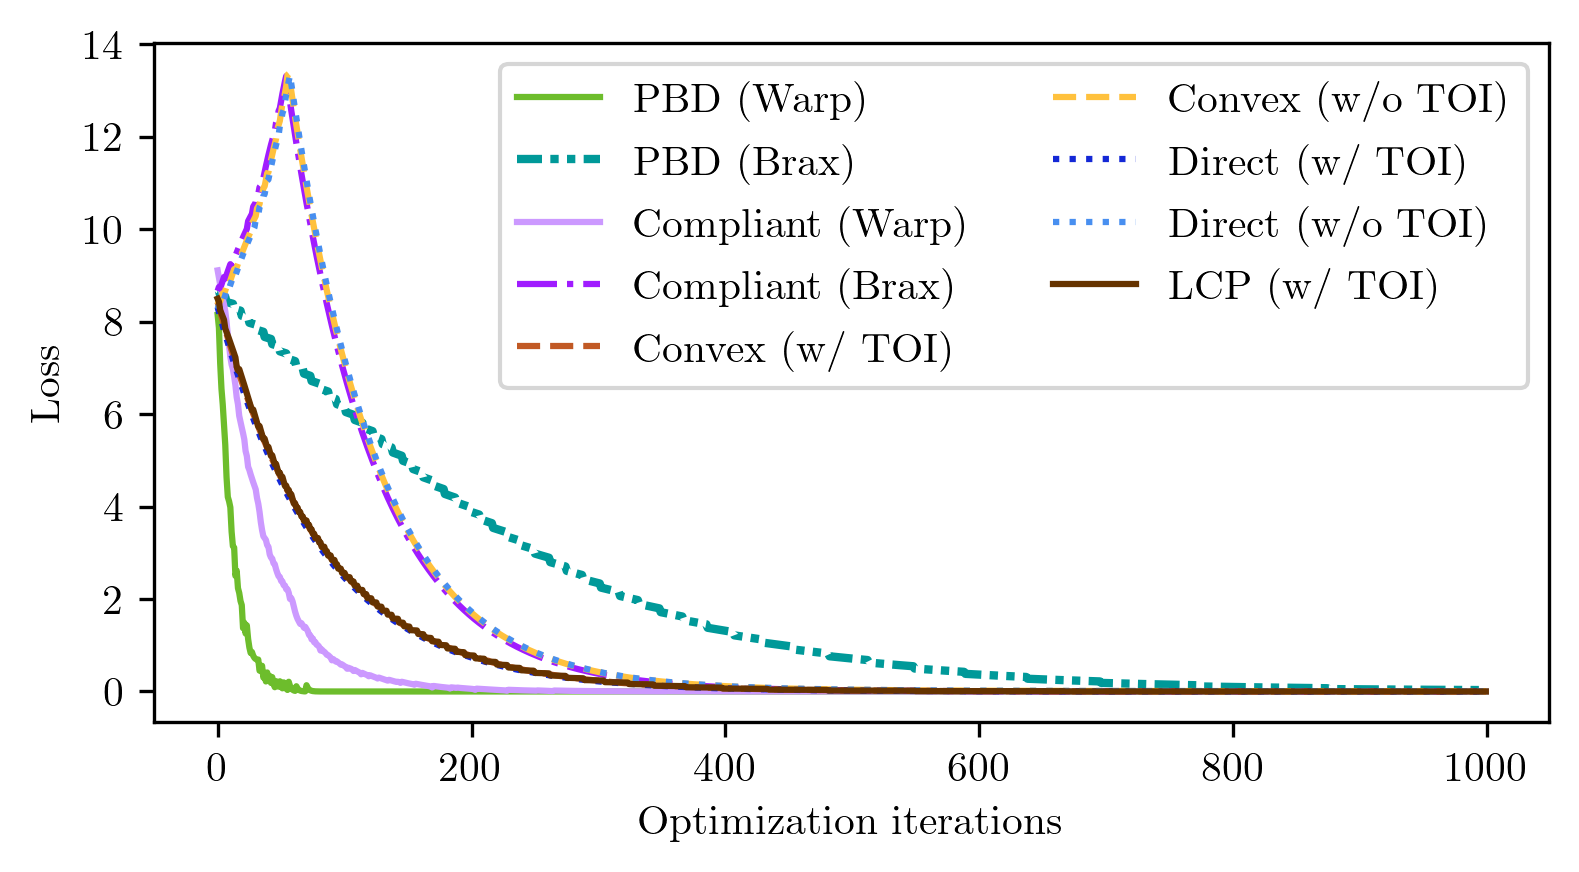

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
for name, label in exp_names.items():
    ax.plot(results[name]['loss'], label=label, **kwargs[name])
ax.legend(ncol=2)
ax.set_ylabel("Loss")
ax.set_xlabel("Optimization iterations")
# fig.savefig(os.path.join(FIG_DIR, "ground_wall_learning_curve.png"), bbox_inches="tight")

Text(0.5, 0, 'Optimization iterations')

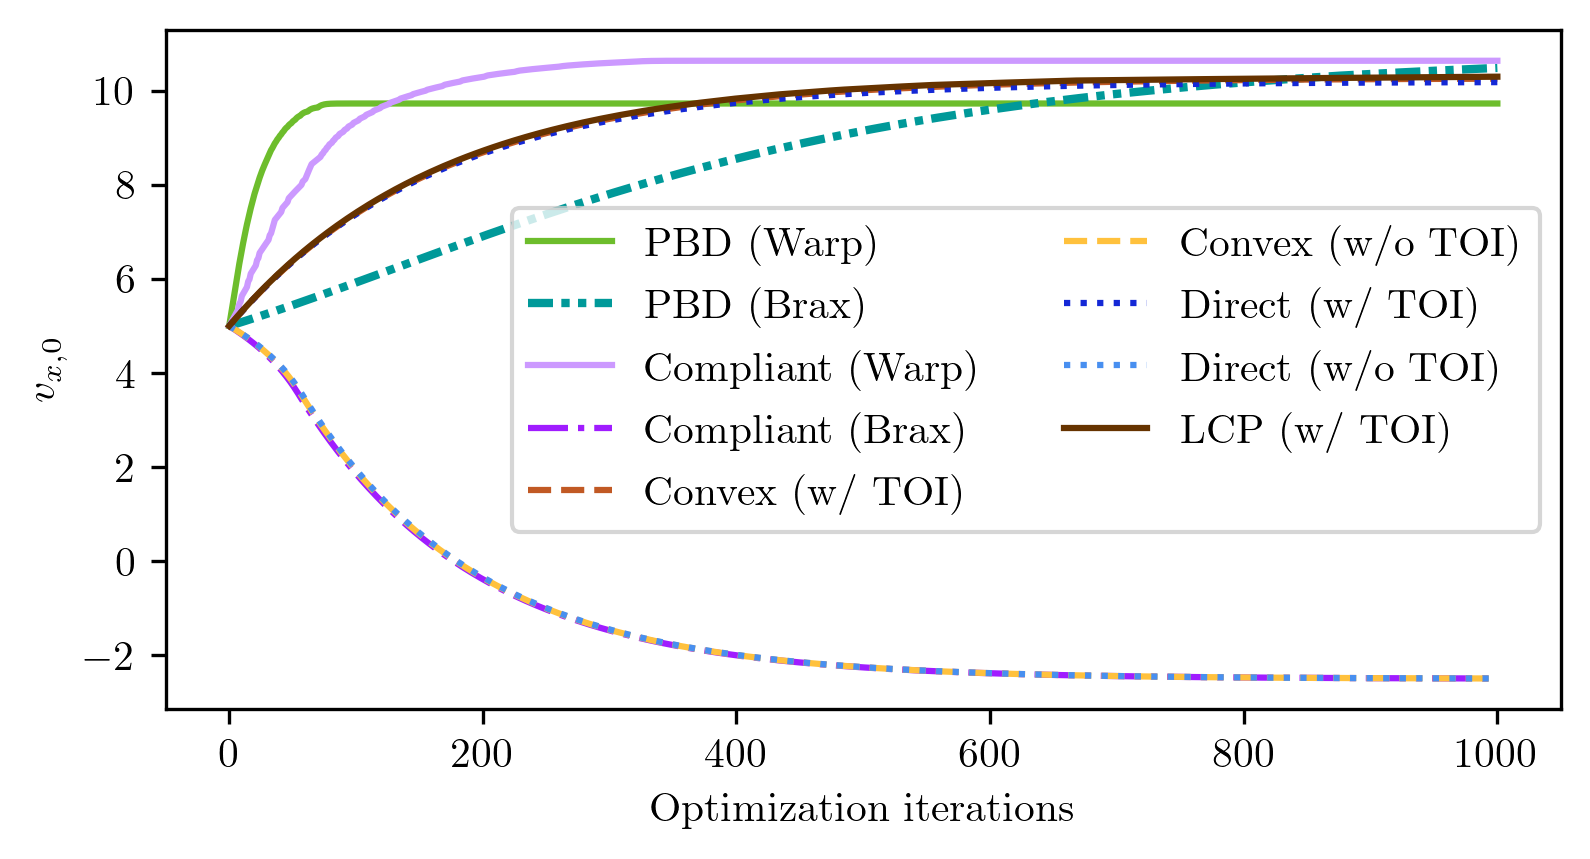

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
for name, label in exp_names.items():
    ax.plot(results[name]['init_vel'][:, 0], label=label, **kwargs[name])   
ax.legend(ncol=2)
ax.set_ylabel("$v_{x, 0}$")
ax.set_xlabel("Optimization iterations")
# fig.savefig(os.path.join(FIG_DIR, "ground_wall_v_x.png"), bbox_inches="tight")-

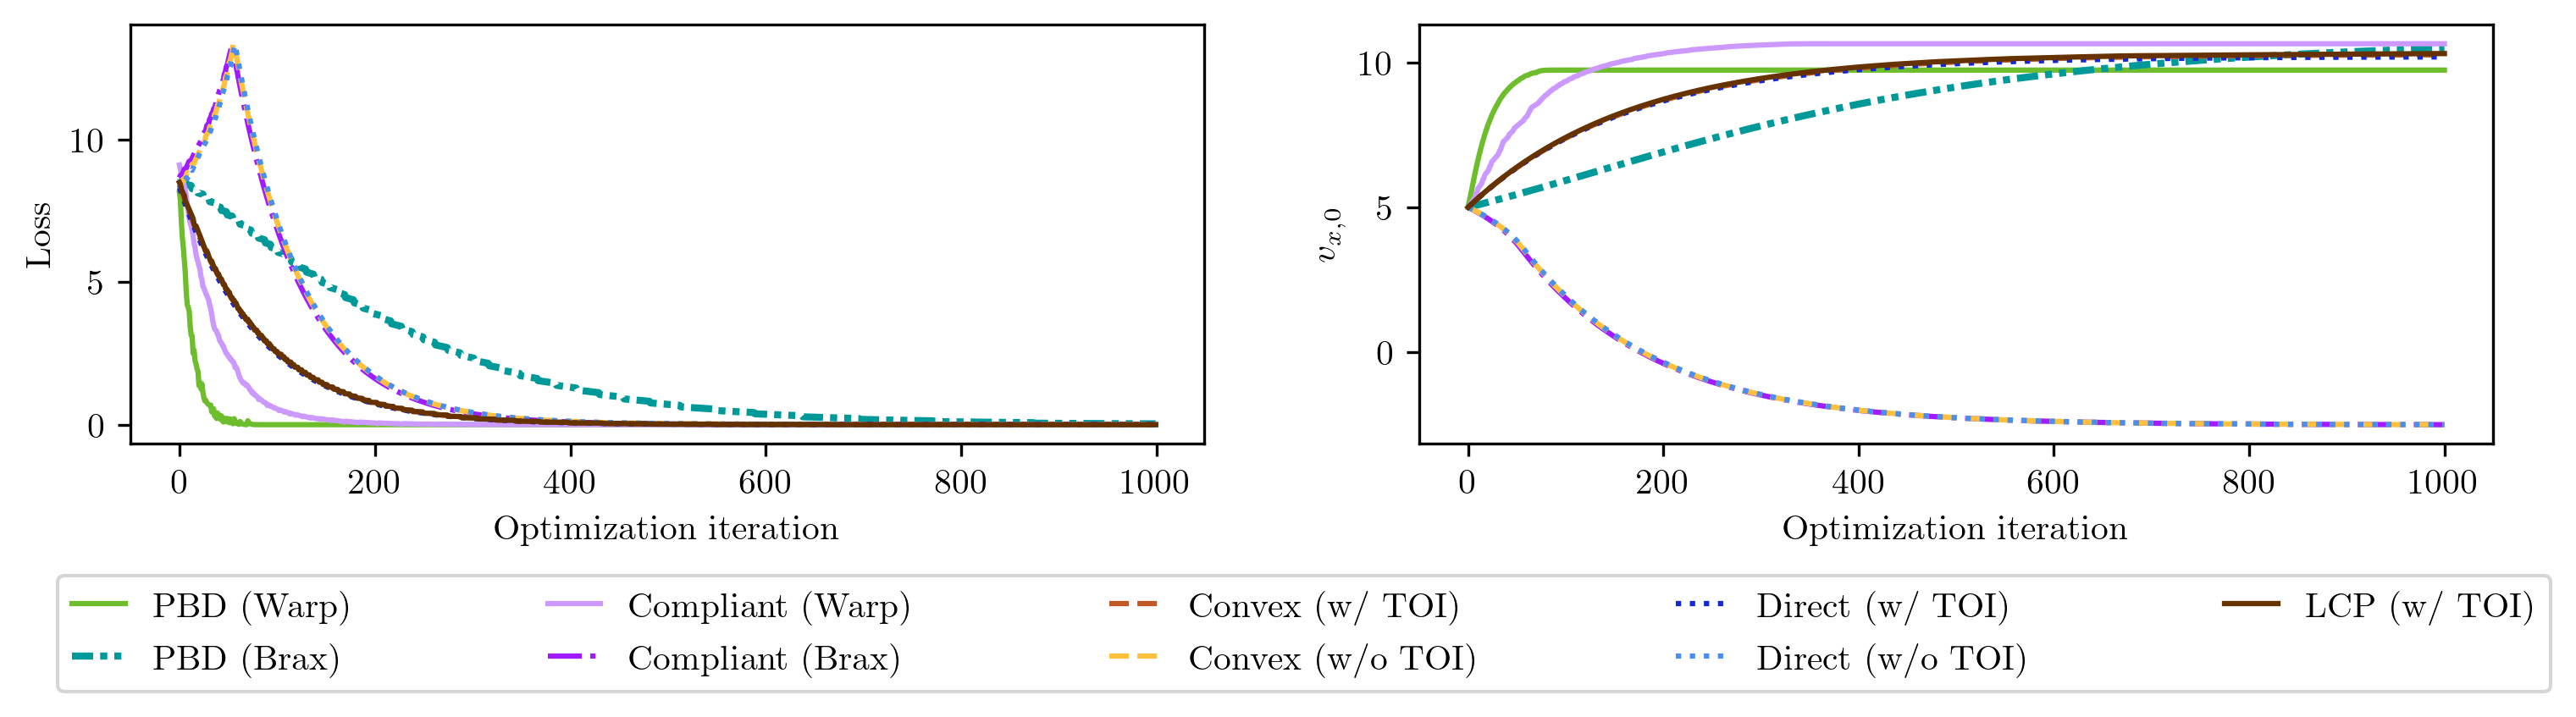

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3.0), dpi=300)
for name, label in exp_names.items():
    axes[0].plot(results[name]['loss'], label=label, **kwargs[name])
axes[0].set_ylabel("Loss")
axes[0].set_xlabel("Optimization iteration")

for name, label in exp_names.items():
    axes[1].plot(results[name]['init_vel'][:, 0], label=label, **kwargs[name])   
axes[1].set_ylabel("$v_{x, 0}$")
axes[1].set_xlabel("Optimization iteration")
fig.subplots_adjust(bottom=0.33)
_, labels = axes[0].get_legend_handles_labels()
fig.legend(labels=labels, 
           bbox_to_anchor=(0.10, 0., 0.82, 0.), 
           loc="lower center", 
           ncol=5, 
           borderaxespad=0.1, 
           mode="expand", 
           handlelength=1.5,
           fontsize=10)
# fig.savefig(os.path.join(FIG_DIR, "ground_wall_learning.png"), bbox_inches="tight")

In [8]:
results["ground_wall_lcp_nimble"]["init_vel"]

array([[ 5.       , -5.       ],
       [ 5.032016 , -4.99681  ],
       [ 5.0639086, -4.9936285],
       ...,
       [10.299321 , -4.13979  ],
       [10.299508 , -4.139708 ],
       [10.299694 , -4.1396265]], dtype=float32)

In [9]:
for name, _ in exp_names.items():
    print(name, results[name]["init_vel"][-1, 0:2])

ground_wall_pbd_warp [ 9.729905  -4.0706034]
ground_wall_pbd_brax [10.48652363 -4.75180626]
ground_wall_soft_warp [10.638576 -4.282096]
ground_wall_soft_brax [-2.49346685 -4.79271269]
ground_wall_convexopt_diffcosim_symplectic_euler_w_toi [10.257491  -4.2041483]
ground_wall_convexopt_diffcosim_symplectic_euler_wo_toi [-2.4933767 -4.3371224]
ground_wall_specialized_difftaichi_w_toi [10.18414593 -4.16055489]
ground_wall_specialized_difftaichi_wo_toi [-2.49333715 -4.29840183]
ground_wall_lcp_nimble [10.299694  -4.1396265]


In [10]:
results["ground_wall_pbd_warp"]["init_vel"][:, 0:2]

array([[ 5.       , -5.       ],
       [ 5.167149 , -4.9791336],
       [ 5.3382254, -4.9475107],
       ...,
       [ 9.729902 , -4.0706053],
       [ 9.7299   , -4.0706043],
       [ 9.729905 , -4.0706034]], dtype=float32)

In [11]:
opt_traj_1 = results["ground_wall_specialized_difftaichi_w_toi"]['last_traj']

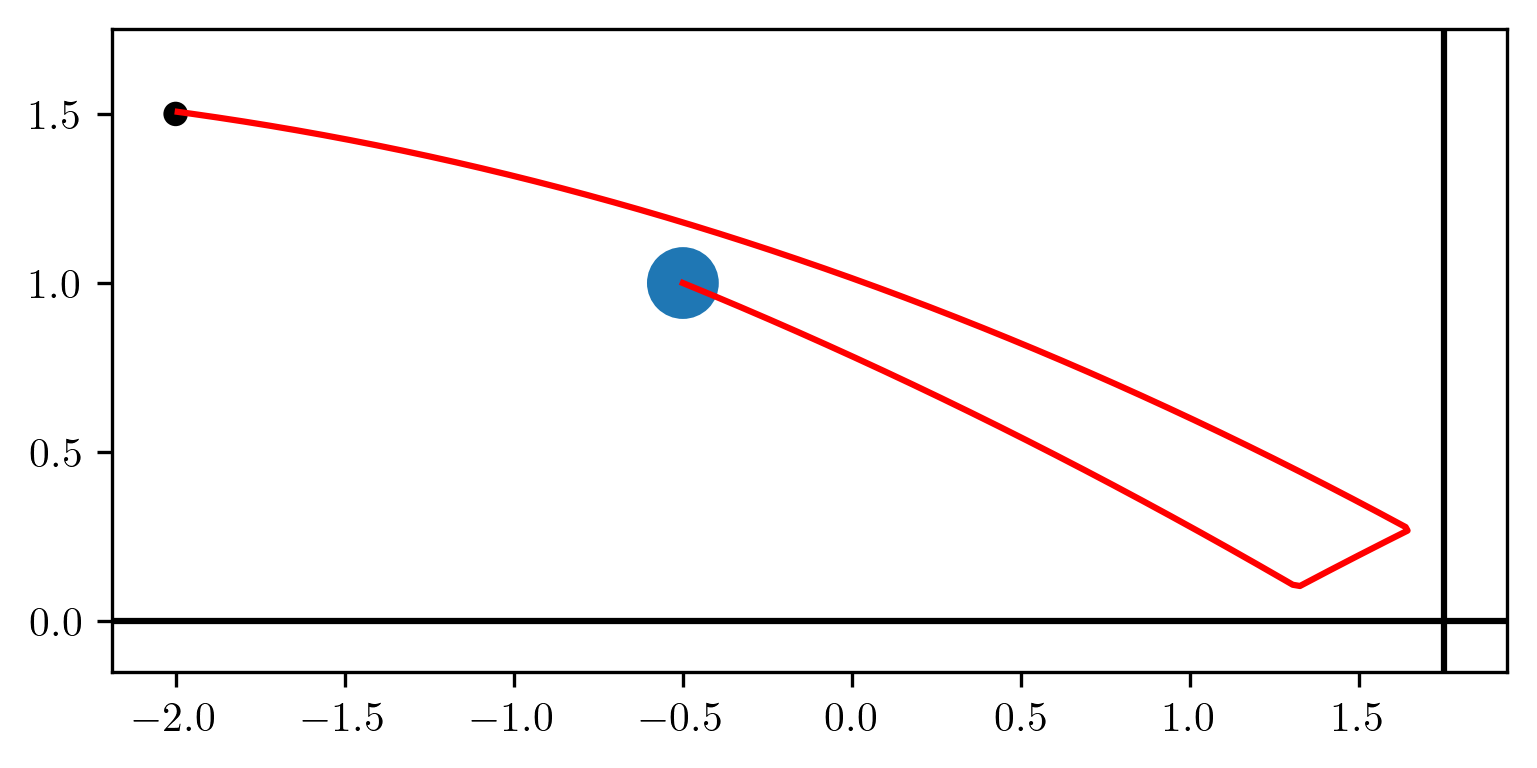

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
ax.set_aspect('equal')
ax.set(ylim=(-0.15, 1.75))
ax.plot(opt_traj_1[:, 0], opt_traj_1[:, 1], color='red')
ax.axline(xy1=(-2, 0), xy2=(1.75, 0), color="k")
# ax.axhline(y=0, xmin=-2, xmax=1.75)
ax.axvline(x=1.75, ymin=0, ymax=1.75, color="k")
circle_ball = plt.Circle((-0.5, 1.0), 0.1, color='tab:blue', fill=True)
ax.add_patch(circle_ball)
circle_target = plt.Circle((-2.0, 1.5), 0.03, color='k', fill=True)
ax.add_patch(circle_target)
# fig.savefig(os.path.join(FIG_DIR, "ground_wall_opt_traj_1.png"), bbox_inches="tight")

In [13]:
opt_traj_2 = results["ground_wall_specialized_difftaichi_wo_toi"]['last_traj']

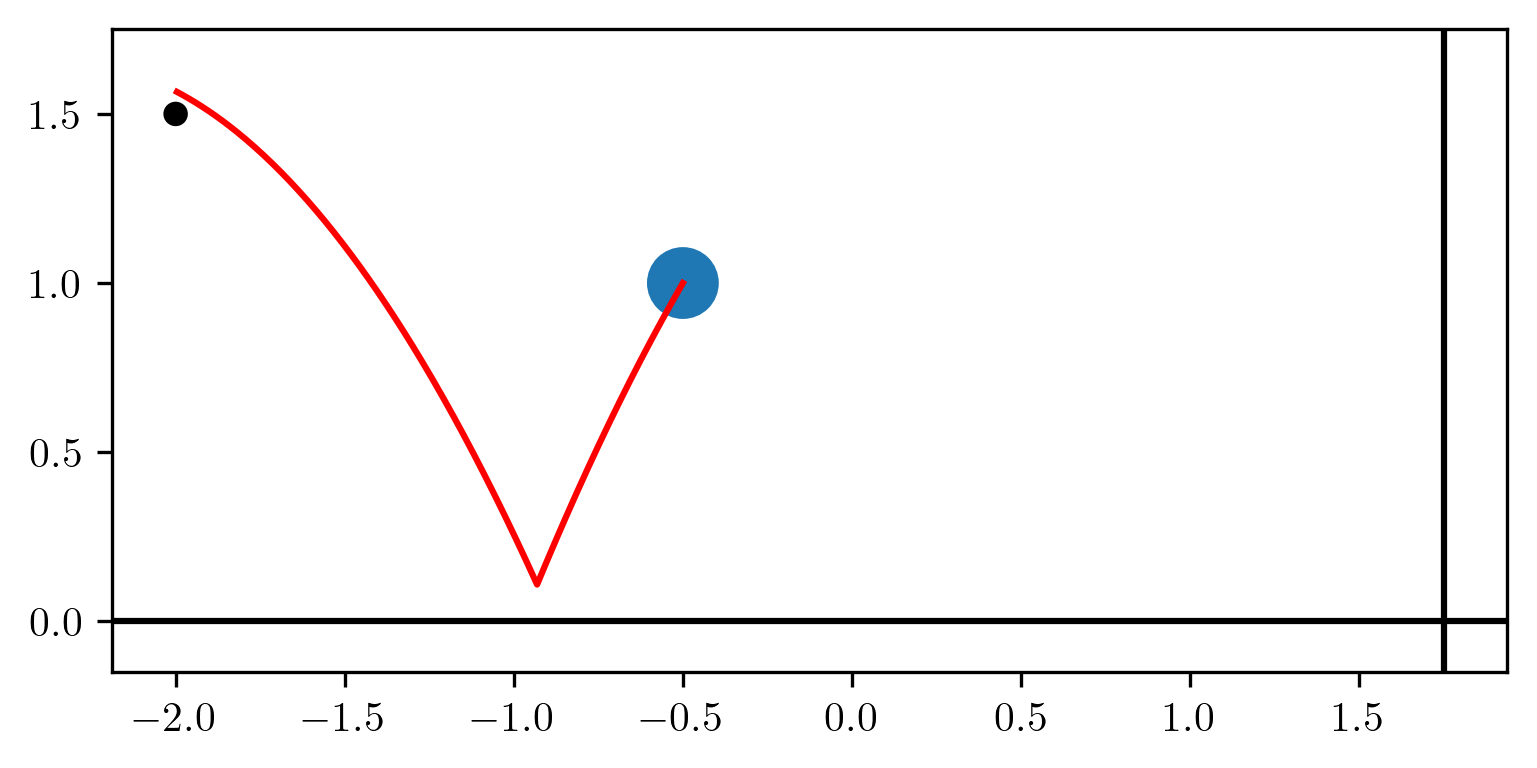

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
ax.set_aspect('equal')
ax.set(ylim=(-0.15, 1.75))
ax.plot(opt_traj_2[:, 0], opt_traj_2[:, 1], color='red')
ax.axline(xy1=(-2, 0), xy2=(1.75, 0), color="k")
# ax.axhline(y=0, xmin=-2, xmax=1.75)
ax.axvline(x=1.75, ymin=0, ymax=1.75, color="k")
circle_ball = plt.Circle((-0.5, 1.0), 0.1, color='tab:blue', fill=True)
ax.add_patch(circle_ball)
circle_target = plt.Circle((-2.0, 1.5), 0.03, color='k', fill=True)
ax.add_patch(circle_target)
# fig.savefig(os.path.join(FIG_DIR, "ground_wall_opt_traj_2.png"), bbox_inches="tight")

In [15]:
from _ground_wall_brax import (
    create_ground_wall_brax_system,
    print_and_train
)
from omegaconf import OmegaConf
import jax
import jax.numpy as jnp

yaml_cfg = OmegaConf.load(os.path.join(THIS_DIR, 'ground_wall.yaml'))
cli_cfg = OmegaConf.from_cli()

cfg = OmegaConf.merge(yaml_cfg, cli_cfg)
cfg.substeps = 2
cfg.large_steps = cfg.steps // cfg.brax_substeps # 240
cfg.dt = cfg.simulation_time / cfg.large_steps # 1./240
cfg.THIS_DIR = THIS_DIR

sys, qp_init = create_ground_wall_brax_system(cfg, dynamics_mode='pbd')

@jax.jit
def compute_loss(qp_init, ctrls):

    def do_one_step(state, a):
        next_state, _ = sys.step(state, a)
        return (next_state, state)
    qp, qp_history = jax.lax.scan(do_one_step, qp_init, ctrls)
    loss = (qp.pos[2, 0] - cfg.target[0]) ** 2 + (qp.pos[2, 2] - cfg.target[1]) ** 2
    return loss, qp_history

ctrls = jnp.array([[cfg.ctrl_input[0], 0., cfg.ctrl_input[1]] for _ in range(cfg.large_steps)])

loss, qp_history = compute_loss(qp_init, ctrls)


/home/z0042y5x/.pyenv/versions/3.8.10/envs/diff_sim/lib/python3.8/site-packages/brax/physics/colliders.py:1160: UserWarning: unsupported collider pair: plane, plane
  warnings.warn(f'unsupported collider pair: {type_a}, {type_b}')


In [16]:
qp_history.pos

DeviceArray([[[ 0.        ,  0.        ,  0.        ],
              [ 1.75      ,  0.        ,  0.        ],
              [-0.5       ,  0.        ,  1.        ]],

             [[ 0.        ,  0.        ,  0.        ],
              [ 1.75      ,  0.        ,  0.        ],
              [-0.4791667 ,  0.        ,  0.9790391 ]],

             [[ 0.        ,  0.        ,  0.        ],
              [ 1.75      ,  0.        ,  0.        ],
              [-0.45833337,  0.        ,  0.9579079 ]],

             ...,

             [[ 0.        ,  0.        ,  0.        ],
              [ 1.75      ,  0.        ,  0.        ],
              [ 0.9975716 ,  0.        ,  1.5728291 ]],

             [[ 0.        ,  0.        ,  0.        ],
              [ 1.75      ,  0.        ,  0.        ],
              [ 0.9799384 ,  0.        ,  1.5782766 ]],

             [[ 0.        ,  0.        ,  0.        ],
              [ 1.75      ,  0.        ,  0.        ],
              [ 0.9623052 ,  0.     

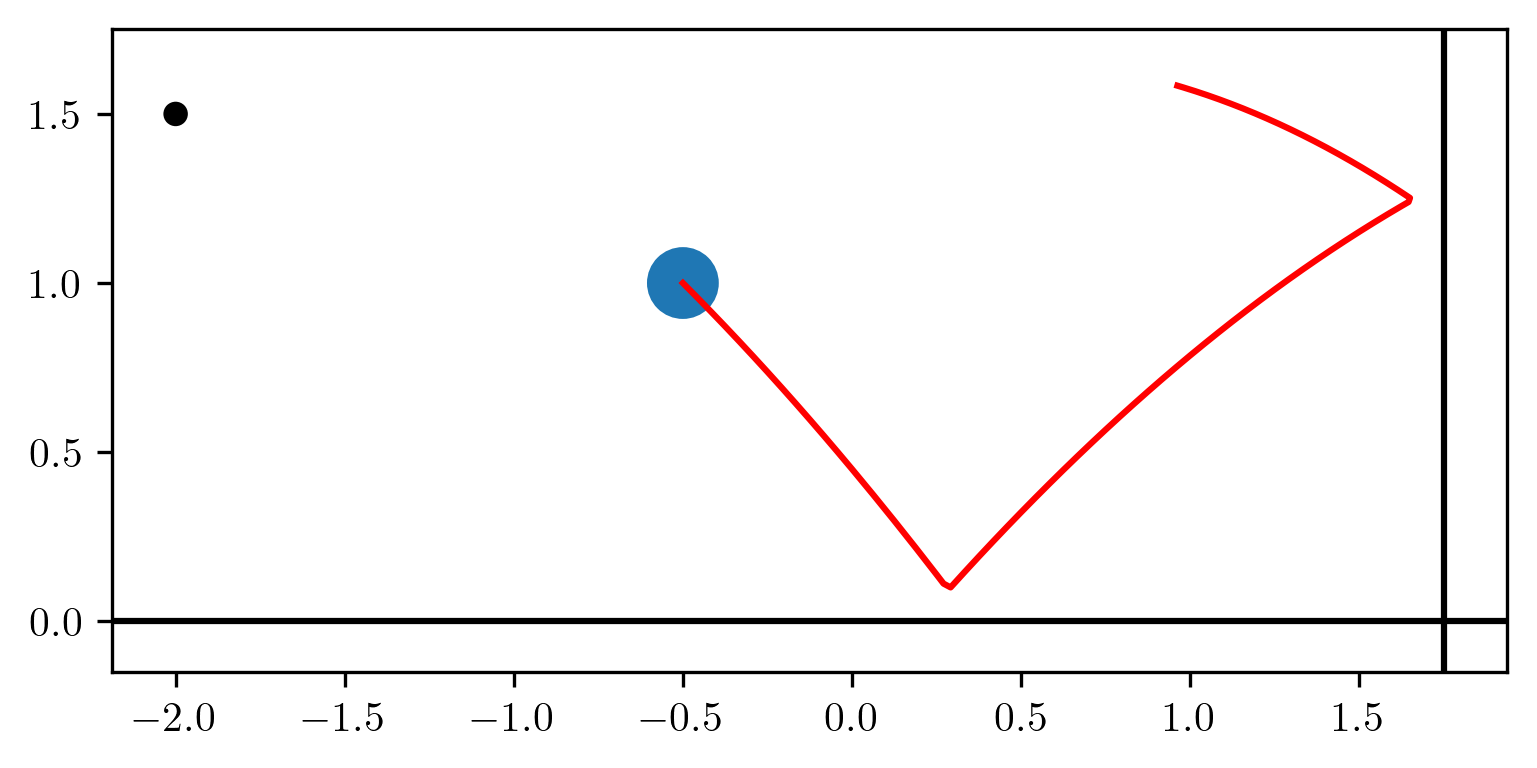

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=300)
ax.set_aspect('equal')
ax.set(ylim=(-0.15, 1.75))
ax.plot(qp_history.pos[:, 2, 0], qp_history.pos[:, 2, 2], color='red')
ax.axline(xy1=(-2, 0), xy2=(1.75, 0), color="k")
# ax.axhline(y=0, xmin=-2, xmax=1.75)
ax.axvline(x=1.75, ymin=0, ymax=1.75, color="k")
circle_ball = plt.Circle((-0.5, 1.0), 0.1, color='tab:blue', fill=True)
ax.add_patch(circle_ball)
circle_target = plt.Circle((-2.0, 1.5), 0.03, color='k', fill=True)
ax.add_patch(circle_target)
# fig.savefig(os.path.join(FIG_DIR, "ground_wall_init_traj.png"), bbox_inches="tight")

## Friction results (add to appendix)

In [18]:
exp_names = OrderedDict([
    ("ground_wall_pbd_warp", "PBD (Warp)"),
    ("ground_wall_pbd_brax", "PBD (Brax)"),
    ("ground_wall_soft_warp", "Compliant (Warp)"),
    ("ground_wall_soft_brax", "Compliant (Brax)"),
    ("ground_wall_convexopt_diffcosim_symplectic_euler_w_toi", "Convex (w/ TOI)"),
    ("ground_wall_convexopt_diffcosim_symplectic_euler_wo_toi", "Convex (w/o TOI)"),
    # ("ground_wall_specialized_difftaichi_w_toi", "Direct (w/ TOI)"),
    # ("ground_wall_specialized_difftaichi_wo_toi", "Direct (w/o TOI)"),
    ("ground_wall_lcp_nimble", "LCP (w/ TOI)"),
])
kwargs = OrderedDict([
    ("ground_wall_convexopt_diffcosim_symplectic_euler_w_toi", {"color": "#c15924", "linestyle": "dashed"}),
    ("ground_wall_convexopt_diffcosim_symplectic_euler_wo_toi", {"color": "#ffc13d", "linestyle": "dashed"}),
    # ("ground_wall_specialized_difftaichi_w_toi", {"color": "#1428d6", "linestyle": "dotted"}),
    # ("ground_wall_specialized_difftaichi_wo_toi", {"color": "#488ff0", "linestyle": "dotted"}),
    ("ground_wall_pbd_brax", {"color": "#009999", "linestyle": (0, (3, 1, 1, 1, 1, 1)), "linewidth": 2}),
    ("ground_wall_pbd_warp", {"color": "#6dbd2c", "linestyle": "solid"}),
    ("ground_wall_lcp_nimble", {"color": "#663300", "linestyle": "solid"}),
    ("ground_wall_soft_brax", {"color": "#a01cff", "linestyle": "dashdot"}),
    ("ground_wall_soft_warp", {"color": "#cc99ff", "linestyle": "solid"}),
])

In [19]:
results = {}
for name, _ in exp_names.items():
    npzfile = np.load(os.path.join(SAVE_DIR, name+"_mu_0.1"+".npz"))
    results[name+"_mu_0.1"] = {}
    results[name+"_mu_0.1"]['loss'] = npzfile['loss']
    results[name+"_mu_0.1"]['init_vel'] = npzfile['init_vel']
    results[name+"_mu_0.1"]['last_traj'] = npzfile['last_traj']

In [20]:
for name, _ in exp_names.items():
    print(name+"_mu_0.1", results[name+"_mu_0.1"]["init_vel"][-1, 0:2])

ground_wall_pbd_warp_mu_0.1 [10.366303  -3.9202332]
ground_wall_pbd_brax_mu_0.1 [10.18785763 -3.94969678]
ground_wall_soft_warp_mu_0.1 [11.816755 -6.431888]
ground_wall_soft_brax_mu_0.1 [-2.57769823 -4.79799175]
ground_wall_convexopt_diffcosim_symplectic_euler_w_toi_mu_0.1 [10.3454485 -3.9920106]
ground_wall_convexopt_diffcosim_symplectic_euler_wo_toi_mu_0.1 [ 0.6267786 -4.7243333]
ground_wall_lcp_nimble_mu_0.1 [11.338899 -6.137768]


In [21]:
for name, _ in exp_names.items():
    print(name+"_mu_0.1", results[name+"_mu_0.1"]["loss"][-1])

ground_wall_pbd_warp_mu_0.1 0.10739252
ground_wall_pbd_brax_mu_0.1 0.15575172
ground_wall_soft_warp_mu_0.1 7.164233e-07
ground_wall_soft_brax_mu_0.1 0.00068033754
ground_wall_convexopt_diffcosim_symplectic_euler_w_toi_mu_0.1 3.9951792132342234e-05
ground_wall_convexopt_diffcosim_symplectic_euler_wo_toi_mu_0.1 1.867913007736206
ground_wall_lcp_nimble_mu_0.1 0.002725417022818008


In [23]:
for name, _ in exp_names.items():
    print(name+"_mu_0.1", results[name+"_mu_0.1"]["loss"][0])

ground_wall_pbd_warp_mu_0.1 10.776179
ground_wall_pbd_brax_mu_0.1 8.710405
ground_wall_soft_warp_mu_0.1 12.14047
ground_wall_soft_brax_mu_0.1 8.901242
ground_wall_convexopt_diffcosim_symplectic_euler_w_toi_mu_0.1 11.836240768432617
ground_wall_convexopt_diffcosim_symplectic_euler_wo_toi_mu_0.1 11.839977264404297
ground_wall_lcp_nimble_mu_0.1 11.66308087525
